# Projet à rendre Master ISF : methodes numériques pour la finance

Le but du projet est de construire un portefeuille cohérent utilisant les datas de stocks fournies en annexe.

L'objectif est de trouver le portefeuille le plus profitable. Les données s'arrêtant en 2019, je m'arrête 1 an avant pour vérifier la persistance de notre prédiction "out of sample".



## Charger les données contenues dans le fichier Stocks.hdf

In [1]:
import os
os.getcwd()

'C:\\Users\\menth\\Desktop\\Méthodes Num'

In [2]:
# Importations des packages

import pandas as pd
import pandas_datareader
from pandas_datareader import data
from pandas_datareader import wb
import datetime
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [18]:
# Métriques et plots utilisés par la suite

def SR(models):
    sharpe = np.sqrt(252.0) * models.mean() / models.std()
    tstat = sharpe * np.sqrt(models.count() / 252.0)
    return (tstat, sharpe )


def ts_to_legend(ts):
    l = []
    if type(ts[0]) == np.float64:
        l.append('%.2f (t=%.2f)' % (ts[1], ts[0]))
    else:
        for i in ts[0].index.values:
            l.append('%s %.2f (t=%.2f)' % (i, ts[1][i], ts[0][i]))

    return l


def plotpnl(self, fontsize = 11):
    models = self
    ts = SR(models)
    fig = plt.figure(1, figsize=(13, 10))
    plt.plot(models.cumsum())
    plt.legend(ts_to_legend(ts), loc=2, prop={'size': fontsize})
    plt.grid()

In [10]:
K=pd.HDFStore('stocks.hdf')

In [45]:
K.keys()

['/AAGIY',
 '/AAIGF',
 '/AAPL',
 '/ABBV',
 '/ABT',
 '/ACGBF',
 '/ACGBY',
 '/ACN',
 '/ADBE',
 '/ALGGY',
 '/AMGN',
 '/AMZN',
 '/AVAL',
 '/AVGO',
 '/AZN',
 '/AZNCF',
 '/BA',
 '/BABA',
 '/BAC',
 '/BAC-PB',
 '/BAC-PC',
 '/BAC-PE',
 '/BAC-PK',
 '/BAC-PL',
 '/BAC-PW',
 '/BAC-PY',
 '/BACHF',
 '/BACHY',
 '/BBL',
 '/BDOUY',
 '/BHP',
 '/BHPBF',
 '/BHPLF',
 '/BML-PG',
 '/BML-PH',
 '/BML-PJ',
 '/BML-PL',
 '/BP',
 '/BPAQF',
 '/BRK-A',
 '/BRK-B',
 '/BUD',
 '/BUDFF',
 '/C',
 '/C-PJ',
 '/C-PS',
 '/CHL',
 '/CHLKF',
 '/CICHF',
 '/CICHY',
 '/CIHKY',
 '/CILJF',
 '/CMCSA',
 '/COST',
 '/CRM',
 '/CSCO',
 '/CVX',
 '/DIS',
 '/EADSF',
 '/EC',
 '/FB',
 '/GLAXF',
 '/GOOG',
 '/GOOGL',
 '/GSK',
 '/HBCYF',
 '/HD',
 '/HON',
 '/HSBC',
 '/HSBC-PA',
 '/IBM',
 '/IDCBF',
 '/IDCBY',
 '/INTC',
 '/ISF',
 '/JNJ',
 '/JPM',
 '/JPM-PD',
 '/KO',
 '/LFC',
 '/LLY',
 '/LRLCF',
 '/LRLCY',
 '/LVMHF',
 '/LVMUY',
 '/MA',
 '/MCD',
 '/MDT',
 '/MGAWY',
 '/MMM',
 '/MMRTY',
 '/MO',
 '/MRK',
 '/MSFT',
 '/NAPRF',
 '/NFLX',
 '/NKE',
 '/NONOF',
 

###  Analyse rapide des returns contruits à partir des Closes ( distribution/Correlation)

In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Définition des bornes temporelles de mon premier portefeuille 

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2018,1 , 1)

In [5]:
# Création du portefeuille - Choix des 10 actions

portfolio=data.DataReader(["AAPL", 'GOOGL','MSFT', 'PEP','AMZN','MCD','TOT','ACN','COST','PEP'],"yahoo", start, end)
portfolio

Attributes   Adj Close                                                    \
Symbols           AAPL         ACN         AMZN        COST        GOOGL   
Date                                                                       
2007-01-03   10.363638   27.862150    38.700001   39.479038   234.029022   
2007-01-04   10.593664   28.490158    38.900002   40.398014   241.871872   
2007-01-05   10.518225   28.091906    38.369999   39.904892   243.838837   
2007-01-08   10.570165   28.497818    37.500000   40.069263   242.032028   
2007-01-09   11.448232   28.428888    37.779999   40.368130   242.992996   
2007-01-10   11.996092   28.597383    37.150002   40.652039   244.974976   
2007-01-11   11.847687   28.482494    37.400002   41.331947   250.110107   
2007-01-12   11.701755   29.087536    38.200001   41.802654   252.752747   
2007-01-16   12.008460   28.413576    38.660000   42.019325   252.392395   
2007-01-17   11.742566   28.735237    37.880001   42.348061   248.888885   
2007-01-18   11.015380   28.451866    36.980000   42.512432   244.159164   
2007-01-19   10.944892   28.145521    37.020000   42.415295   245.120117   
2007-01-22   10.733409   28.091906    36.950001   42.094032   240.660660   
2007-01-23   10.598609   28.214453    36.430000   42.168751   239.764771   
2007-01-24   10.722281   28.122547    37.259998   42.631977   249.784790   
2007-01-25   10.666628   27.977032    37.080002   41.638271   244.289291   
2007-01-26   10.559033   27.977032    36.849998   41.361847   248.168167   
2007-01-29   10.628289   28.283382    37.430000   41.294582   246.481476   
2007-01-30   10.580058   28.336985    37.049999   41.316998   247.407410   
2007-01-31   10.602318   28.911385    37.669998   41.959541   251.001007   
2007-02-01   10.479885   29.171776    38.700001   42.131390   241.116119   
2007-02-02   10.481125   29.554710    37.389999   41.847488   240.990997   
2007-02-05   10.380950   29.608318    37.160000   41.996891   233.813812   
2007-02-06   10.406919   29.531731    38.270000   42.265884   235.975983   
2007-02-07   10.654263   29.945303    38.980000   42.684261   235.240234   
2007-02-08   10.657969   29.746176    39.099998   42.303211   235.750748   
2007-02-09   10.298089   29.707880    38.720001   41.825058   231.176178   
2007-02-12   10.497200   29.370899    38.849998   41.787617   229.374374   
2007-02-13   10.474938   29.654270    39.310001   42.281876   229.779785   
2007-02-14   10.549142   30.021893    40.139999   42.723709   233.198196   
...                ...         ...          ...         ...          ...   
2017-11-16  165.233490  141.446884  1137.290039  166.825195  1048.469971   
2017-11-17  164.316040  139.917374  1129.880005  166.825195  1035.890015   
2017-11-20  164.151901  140.994766  1126.310059  168.093613  1034.660034   
2017-11-21  167.203537  142.379974  1139.489990  169.205887  1050.300049   
2017-11-22  168.961121  141.514236  1156.160034  168.288742  1051.920044   
2017-11-24  168.970795  142.014450  1186.000000  167.449631  1056.520020   
2017-11-27  168.120956  141.889389  1195.829956  168.415588  1072.010010   
2017-11-28  167.135941  142.408844  1193.599976  169.430313  1063.290039   
2017-11-29  163.669067  141.360306  1161.270020  173.216019  1037.380005   
2017-11-30  165.957764  142.379974  1176.750000  179.948380  1036.170044   
2017-12-01  165.185196  140.994766  1162.349976  180.631378  1025.069946   
2017-12-04  163.978043  141.552704  1133.949951  184.953720  1011.869995   
2017-12-05  163.823517  142.052933  1141.569946  183.255981  1019.599976   
2017-12-06  163.215149  142.630096  1152.349976  182.670563  1032.719971   
2017-12-07  163.514542  142.947540  1159.790039  181.675369  1044.569946   
2017-12-08  163.562775  144.804123  1162.000000  183.499939  1049.380005   
2017-12-11  166.749649  144.958038  1168.920044  184.270706  1051.969971   
2017-12-12  165.812897  146.314423  1165.079956  183.724335  1048.770020   
2017-12-13  166.363358  145.660278  1164.130005 

In [52]:
# Informations sur la matrice du portefeuille

print("Structure : ",portfolio.shape,"\n")

print("Colonnes :", portfolio.columns)


Structure :  (2769, 54) 

Colonnes : MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'ACN', 'AMZN', 'COST', 'GOOGL', 'MCD', 'MSFT', 'PEP', 'TOT']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8]],
           names=['Attributes', 'Symbols'])


In [6]:
# Réduction de la matrice aux prix "Close" 

portfolio_close=portfolio.Close
portfolio_close

Symbols,AAPL,ACN,AMZN,COST,GOOGL,MCD,MSFT,PEP,TOT
Date,,,,,,,,,
2007-01-03,11.971429,36.380001,38.700001,52.840000,234.029022,43.869999,29.860001,62.720001,70.970001
2007-01-04,12.237143,37.200001,38.900002,54.070000,241.871872,43.540001,29.809999,63.150002,69.320000
2007-01-05,12.150000,36.680000,38.369999,53.410000,243.838837,43.540001,29.639999,62.950001,68.980003
2007-01-08,12.210000,37.209999,37.500000,53.630001,242.032028,43.709999,29.930000,63.090000,68.779999
2007-01-09,13.224286,37.119999,37.779999,54.029999,242.992996,43.790001,29.959999,63.349998,67.669998
2007-01-10,13.857142,37.340000,37.150002,54.410000,244.974976,44.259998,29.660000,64.150002,66.169998
2007-01-11,13.685715,37.189999,37.400002,55.320000,250.110107,44.509998,30.700001,64.949997,66.650002
2007-01-12,13.517143,37.980000,38.200001,55.950001,252.752747,44.220001,31.209999,64.699997,67.900002
2007-01-16,13.871428,37.099998,38.660000,56.240002,252.392395,44.570000,31.160000,64.849998,66.660004


In [7]:
# Création des returns (en coeff de variation et en pourcentage) et des log_returns :

returns_coef=portfolio_close/portfolio_close.shift(1)

returns=portfolio_close.pct_change().dropna()

ret_log=np.log(returns)

returns

C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


Symbols,AAPL,ACN,AMZN,COST,GOOGL,MCD,MSFT,PEP,TOT
Date,,,,,,,,,
2007-01-04,0.022196,0.022540,0.005168,0.023278,0.033512,-0.007522,-0.001675,0.006856,-0.023249
2007-01-05,-0.007121,-0.013979,-0.013625,-0.012206,0.008132,0.000000,-0.005703,-0.003167,-0.004905
2007-01-08,0.004938,0.014449,-0.022674,0.004119,-0.007410,0.003904,0.009784,0.002224,-0.002899
2007-01-09,0.083070,-0.002419,0.007467,0.007458,0.003970,0.001830,0.001002,0.004121,-0.016138
2007-01-10,0.047856,0.005927,-0.016675,0.007033,0.008157,0.010733,-0.010013,0.012628,-0.022166
2007-01-11,-0.012371,-0.004017,0.006729,0.016725,0.020962,0.005648,0.035064,0.012471,0.007254
2007-01-12,-0.012317,0.021242,0.021390,0.011388,0.010566,-0.006515,0.016612,-0.003849,0.018755
2007-01-16,0.026210,-0.023170,0.012042,0.005183,-0.001426,0.007915,-0.001602,0.002318,-0.018262
2007-01-17,-0.022142,0.011321,-0.020176,0.007824,-0.013881,0.006507,-0.001926,0.002313,0.004500


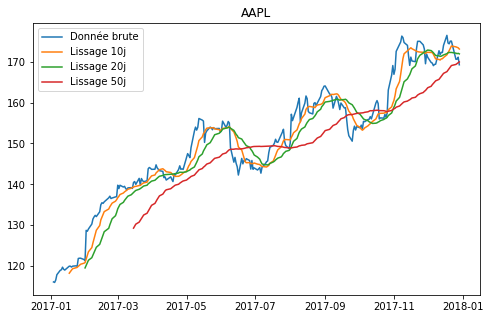

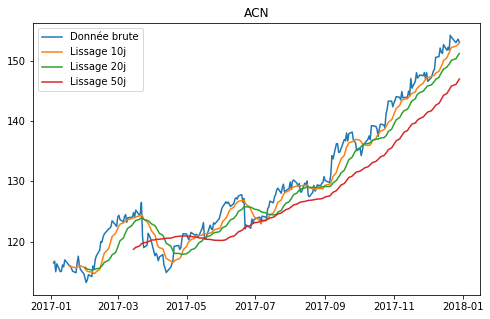

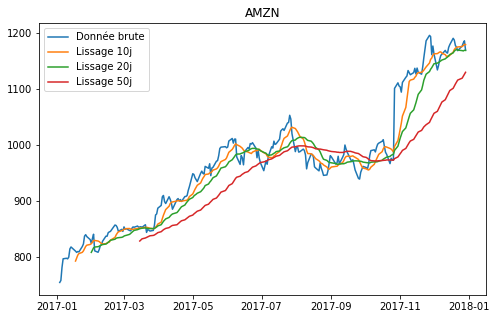

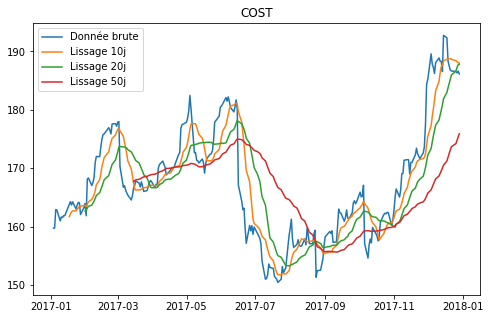

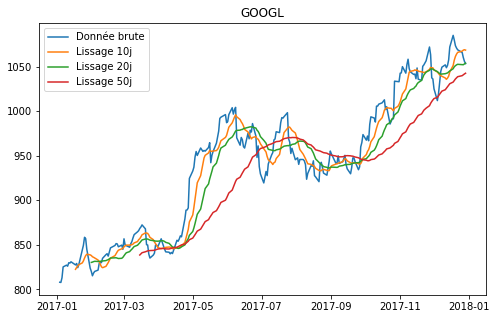

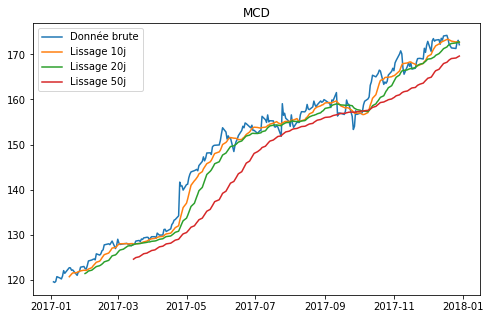

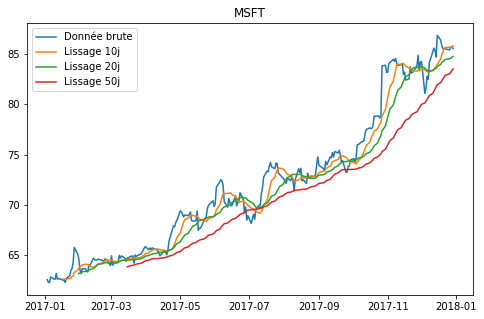

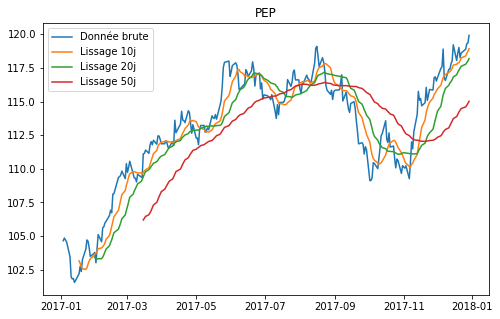

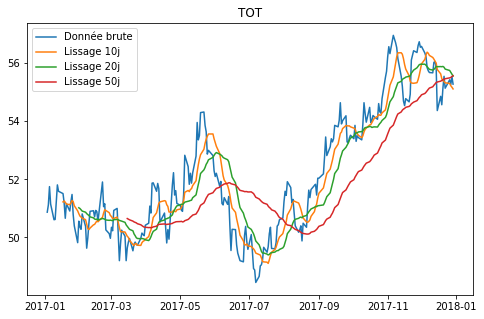

In [10]:
# On regarde la volatilité des Prix à la fermeture et le trends lissés sur 2017; pour se rendre compte de la volatilité de manière
# précise sur qu'une année pour l'instant.
# On constate des chocs importants pour la plupart de nos actions et rares sont celles qui peuvent prétendre afficher un trend 
# relativement solide. ON peut néanmoins retenir ACN, AAPL et MSFT qui ont cette caractéristique.
# La courbe lissée sur 50 jours (rouge) pour ACN semble afficher un trend positif sur presque toute la période observée.
# Pour les autres actions, les chocs (négatifs) ont lieu entre juillet et octobre 2017. 

for c in portfolio_close :
    fig = plt.figure(figsize=(8,5))
    plt.plot(portfolio_close[c]['2017':], label='Donnée brute')
    plt.plot(portfolio_close[c]['2017':].rolling(10).mean(), label='Lissage 10j')
    plt.plot(portfolio_close[c]['2017':].rolling(20).mean(), label='Lissage 20j')
    plt.plot(portfolio_close[c]['2017':].rolling(50).mean(), label='Lissage 50j')
    plt.title(str(c))
    plt.legend(loc='upper left')

plt.show()

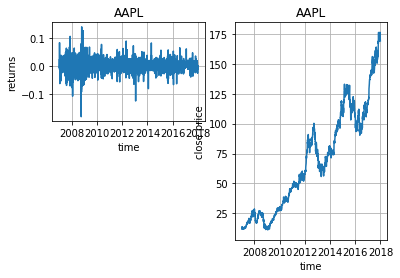

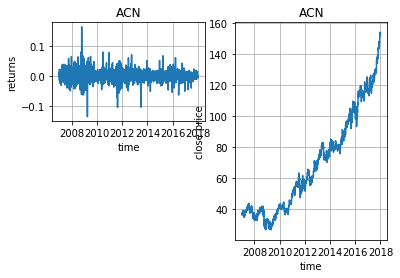

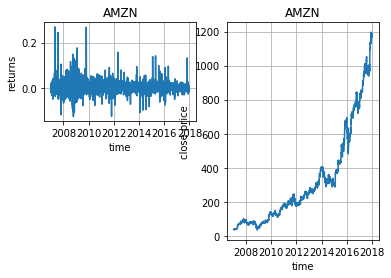

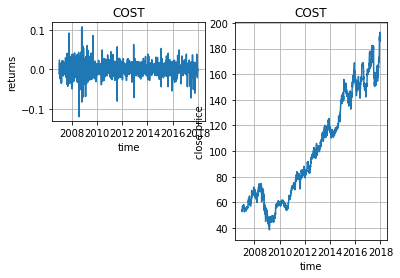

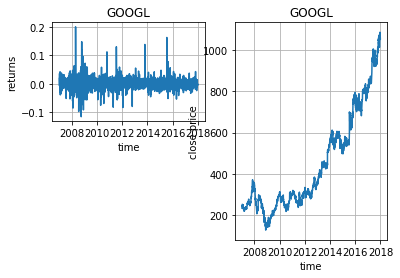

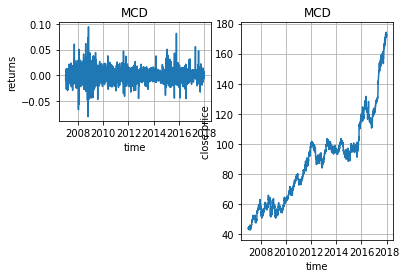

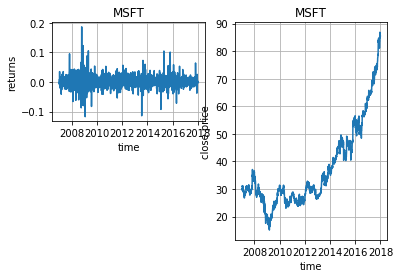

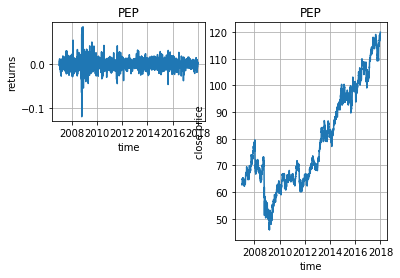

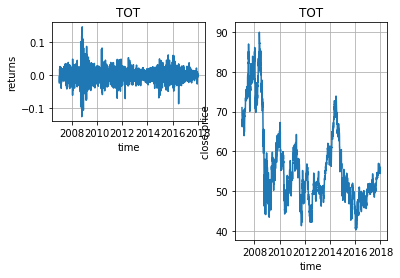

In [85]:
# Graphes des Closing prices et des returns pour chaque action
# Les deux plot relatent l'idée d'une assez forte volatilité avec quand même une présence de "Volatility clustering" pour la 
# plupart des actions, à savoir que de faibles chocs sont suivies par des chocs de même ampleur en moyenne; et des forts chocs
# par des chocs tout aussi forts en moyenne. C'est une caractéristique classique du cours des actions financières comme 
# Martingales stochastiques ( l'espérance conditionnelle de la valeur à t+1  est égale à la valeur en t).

for c in ret_log:
    ax = plt.subplot2grid((2, 2), (0,0))
    ax.plot(returns.index, returns[c], label=str(c))
    ax.grid(True)
    ax.set_title(str(c))
    ax.set_xlabel('time')
    ax.set_ylabel('returns')

    ax = plt.subplot2grid((1, 2), (0,1))
    ax.plot(portfolio_close.index, portfolio_close[c], label=str(c))
    ax.grid(True)
    ax.set_title(str(c))
    ax.set_xlabel('time')
    ax.set_ylabel('close price')
    plt.show()

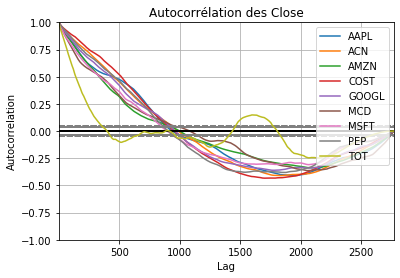

In [24]:
# Une bonne manière de tester le caractère martingale des Close et des returns consiste à étudier leurs auto-corrélations :
# On constate ici une très forte autocorrélation des "Close" pour 9 de nos 10 actions (au moins pendant les 500 premiers jours).
# A noter que pour ces actions, la tendance de l'auto-corrélation est quasiment la même (elle atteint 0 sur 1000 jours puis devient
# négative)
# L'action Total affiche une structure d'autocorrélation différente puisque son taux de croissance négatif est beaucoup plus éle-
# vé (en valeur absolue bien-sûr). Cela est une signe probable d'une volatilité du prix Close beaucoup plus importante que pour les 
# autres actions. 

for c in portfolio.Close:
    autocorrelation_plot(portfolio.Close[c], label=str(c))
    plt.title("Autocorrélation des Close")
    plt.legend(loc='upper right')


C:\Users\menth\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


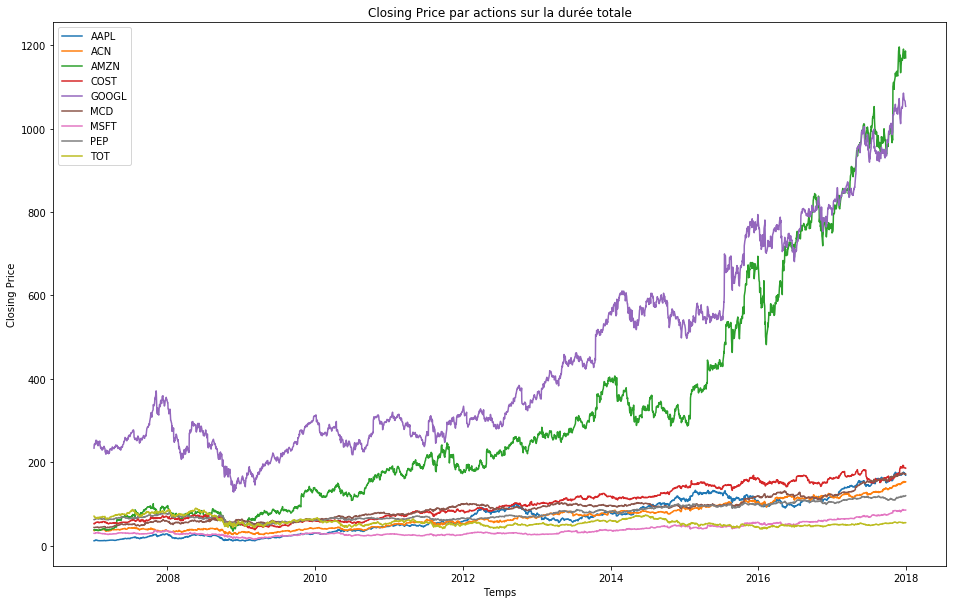

In [10]:
# Comparaison des prix à la fermeture sur toute la période étudiée.
# Deux actions se démarquent, et se cotoient : Amazon et Google. On observe que Google était la seule action avec un CP
# à plus de 200 USD en 2008. On peut voir le rapide "catch up" de Apple à partir de 2009, ce qui correspond à la lancée de 
# l'iPhone 3GS qui leur a permis d'exploser en terme de valeur financière par la suite.

def plot_by_stoks(dates, values, title):
    fig = plt.figure(figsize=(16,10))
    for c in ret_log:
        plt.plot(dates, values[c], label=str(c))
    plt.title(title)
    plt.xlabel('Temps')
    plt.ylabel('Closing Price')
    plt.legend(loc='upper left')

plot_by_stoks(portfolio_close.index, portfolio_close, 'Closing Price par actions sur la durée totale')

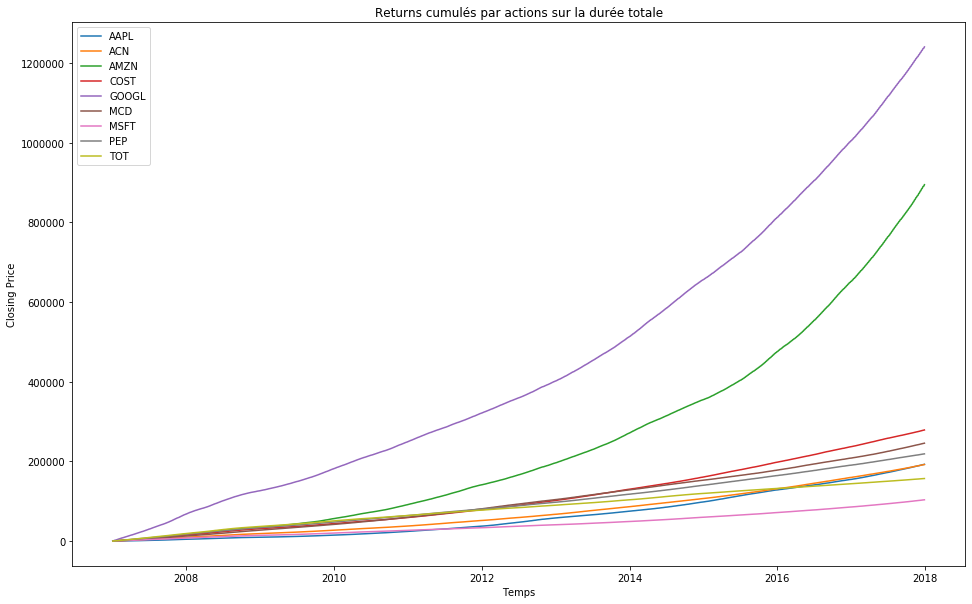

In [65]:
# Mêmes remarques, ce graphe nous permet de mieux apprécier les évolutions globales par actions sur toute la durée étudiée.
# On observe que Microsoft affiche la pente la plus faible.
# On remarque également (graphiquement) que l'indice de convexité pour l'action apple est plus grand que pour toutes les autres
# actions.

plot_by_stoks(portfolio_close.index, portfolio_close.cumsum(), 'Closing Prices cumulés par actions sur la durée totale')

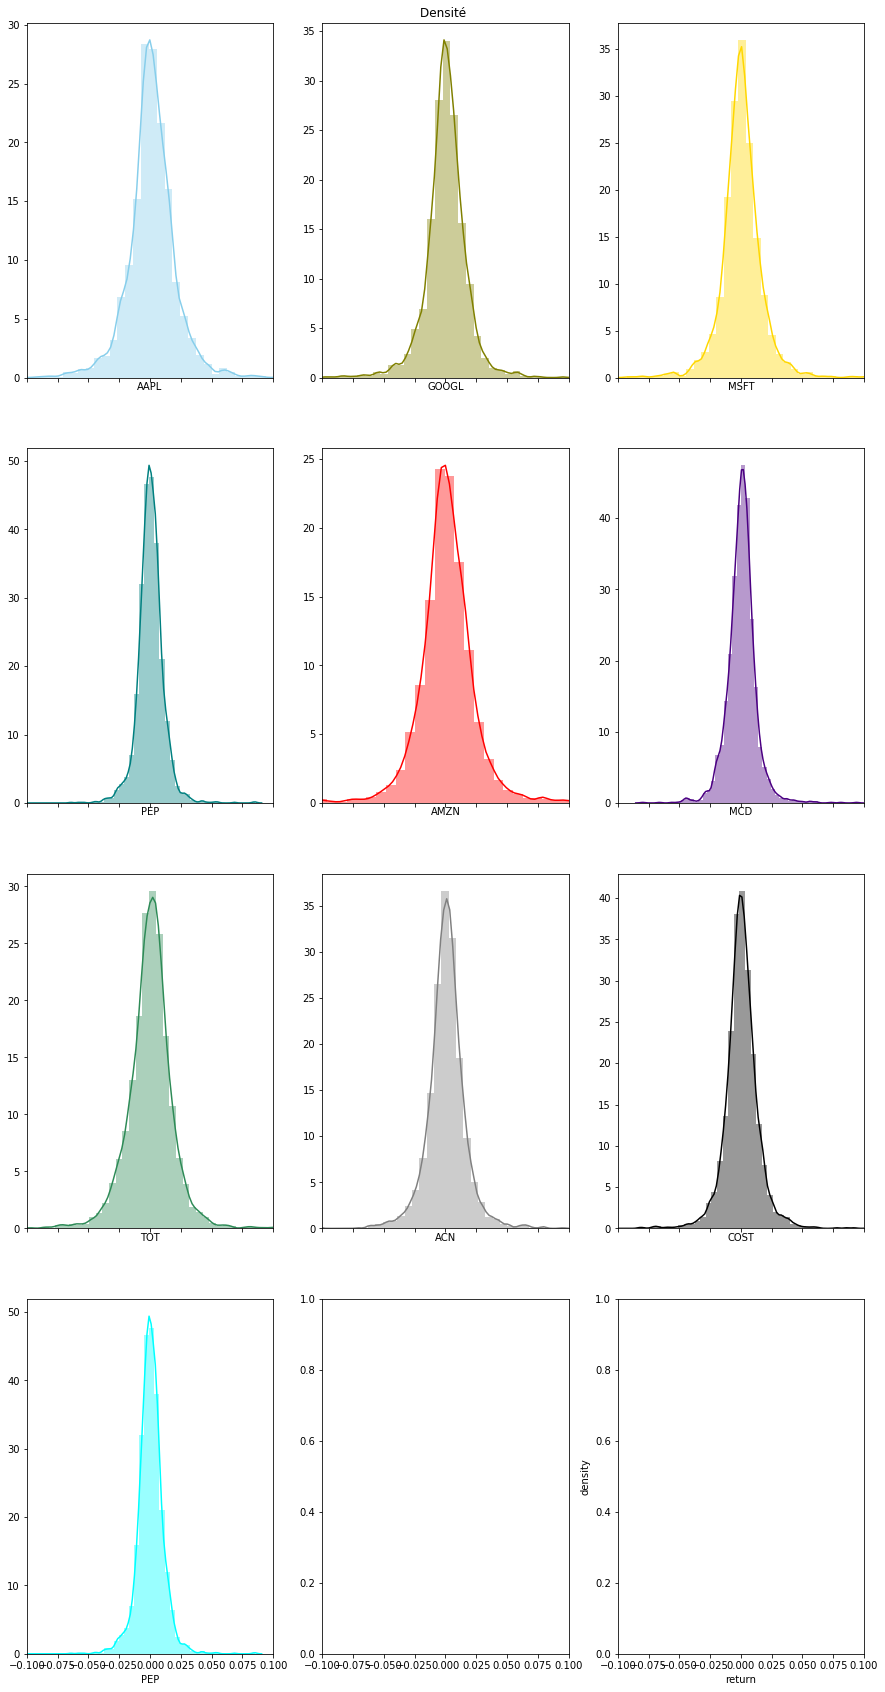

In [75]:
# Plot des densités des returns en pourcentages 
# Courbes de gausses avec néanmoins des variance (étalement) différentes. 

f, axes = plt.subplots(4, 3, figsize=(15,30), sharex=True)
sns.distplot(returns["AAPL"] , color="skyblue", ax=axes[0, 0])
sns.distplot(returns['GOOGL'] , color="olive", ax=axes[0, 1]).set_title('Densité ')
sns.distplot(returns['MSFT'] , color="gold", ax=axes[0, 2])
sns.distplot(returns['PEP'], color="teal", ax=axes[1, 0])
sns.distplot(returns['AMZN'] , color="red", ax=axes[1, 1])
sns.distplot(returns['MCD'] , color="indigo", ax=axes[1, 2])
sns.distplot(returns['TOT'] , color="seagreen", ax=axes[2, 0])
sns.distplot(returns['ACN'] , color="grey", ax=axes[2, 1])
sns.distplot(returns['COST'] , color="black", ax=axes[2, 2])
sns.distplot(returns['PEP'] , color="cyan", ax=axes[3, 0])
plt.xlim({-0.10,0.10})
plt.xlabel('return')
plt.ylabel('density')
plt.show()

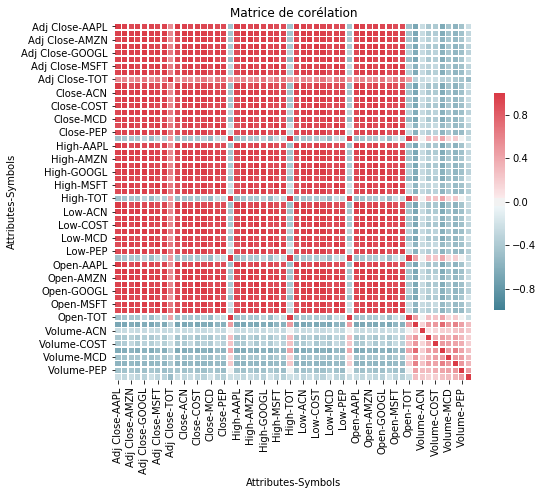

In [86]:
## Analyse des corrélations de chaque variables entre elles (et pour chaque action)
# Il n'y a guère que la variable "Volume" qui semble être indépendante de toutes les autres variables

def plot_heatmap_corr(df):    
    f, ax = plt.subplots(figsize=(8, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Matrice de corélation')
    
plot_heatmap_corr(portfolio)

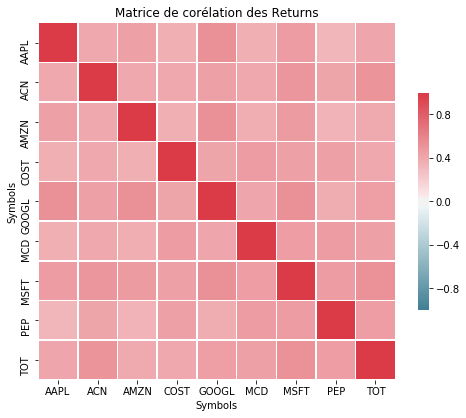

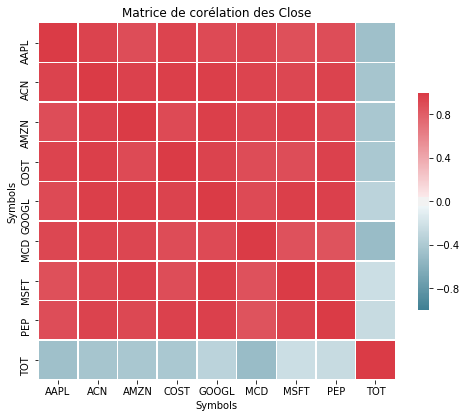

In [8]:
# Focus sur l'analyse des corrélations des returns entre les différentes actions
# On remarque une corrélation des returns un peu plus forte entre les 4 GAFAM (Google, Amazone, APPLE, Microsoft )
# Les Close de l'action Total semblent être Total-ement indépendant des autres actions qui affichent des corrélations positives
# et relativement significatives. On peut penser à la grande volatilité du prix du pétrole; par ailleurs on remarque qu'à partir de
# 2016, le trend de total pour les closes est en relatif déclin comparé aux trends des 9 autres actions qui ont une pente posi
# tive.

def plot_heatmap_corr(df, title):    
    f, ax = plt.subplots(figsize=(8, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    
plot_heatmap_corr(returns, 'Matrice de corélation des Returns')
plot_heatmap_corr(portfolio_close, 'Matrice de corélation des Close')

### Construire une bases de returns proprement normalisée

In [11]:
# Normalisation "manuelle"
returns_norm = (returns - returns.mean()) /returns.std()
returns_norm


Symbols,AAPL,ACN,AMZN,COST,GOOGL,MCD,MSFT,PEP,TOT
Date,,,,,,,,,
2007-01-04,1.048948,1.362761,0.143857,1.608171,1.804291,-0.688597,-0.127599,0.607218,-1.234258
2007-01-05,-0.412876,-0.910513,-0.601806,-0.903146,0.408381,-0.047929,-0.360902,-0.320093,-0.264072
2007-01-08,0.188446,0.859121,-0.960862,0.252255,-0.446440,0.284613,0.536041,0.178681,-0.158019
2007-01-09,4.084328,-0.190914,0.235064,0.488591,0.179479,0.107958,0.027432,0.354198,-0.858187
2007-01-10,2.328430,0.328593,-0.722851,0.458490,0.409716,0.866207,-0.610552,1.141277,-1.176988
2007-01-11,-0.674651,-0.290419,0.205815,1.144400,1.114014,0.433153,2.000163,1.126696,0.378970
2007-01-12,-0.671971,1.281988,0.787533,0.766717,0.542232,-0.602843,0.931506,-0.383195,0.987201
2007-01-16,1.249119,-1.482693,0.416601,0.327565,-0.117310,0.626192,-0.123401,0.187418,-0.970503
2007-01-17,-1.161865,0.664374,-0.861743,0.514432,-0.802366,0.506246,-0.142137,0.186922,0.233335


In [35]:
import sklearn.preprocessing as pp

LogRet_norm = pp.normalize(ret_log2)
LogRet_norm


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
ret_log2=ret_log.dropna(axis=0)
ret_log2

Symbols,AAPL,ACN,AMZN,COST,GOOGL,MCD,MSFT,PEP,TOT
Date,,,,,,,,,
2007-01-31,-6.163914,-3.898600,-4.090306,-4.163595,-4.231883,-4.323679,-4.384652,-6.072881,-5.057873
2007-03-06,-3.832121,-4.631296,-3.186999,-4.766888,-3.279529,-5.419843,-4.588966,-4.852832,-3.910773
2007-03-19,-4.063460,-4.197623,-4.144453,-5.316980,-4.235537,-4.713911,-4.001132,-5.445618,-4.157507
2007-03-21,-3.644826,-4.731253,-3.453885,-3.825263,-3.676559,-4.995186,-3.712136,-4.397927,-4.323985
2007-04-16,-4.328519,-6.181593,-2.721342,-5.419052,-4.067867,-4.640204,-5.474029,-5.997720,-5.756553
2007-04-25,-3.788488,-4.167701,-1.311197,-7.905603,-6.945114,-5.713527,-4.969472,-4.757967,-4.000659
2007-05-09,-4.055694,-4.424849,-4.104589,-5.108886,-5.253924,-4.552255,-6.932425,-8.119120,-5.483173
2007-05-11,-4.339530,-8.251571,-4.555844,-7.918424,-4.472388,-4.342804,-4.591531,-4.993441,-4.322641
2007-07-11,-8.104303,-4.485529,-5.050985,-5.663443,-6.175542,-4.886381,-5.211193,-5.614808,-5.336332


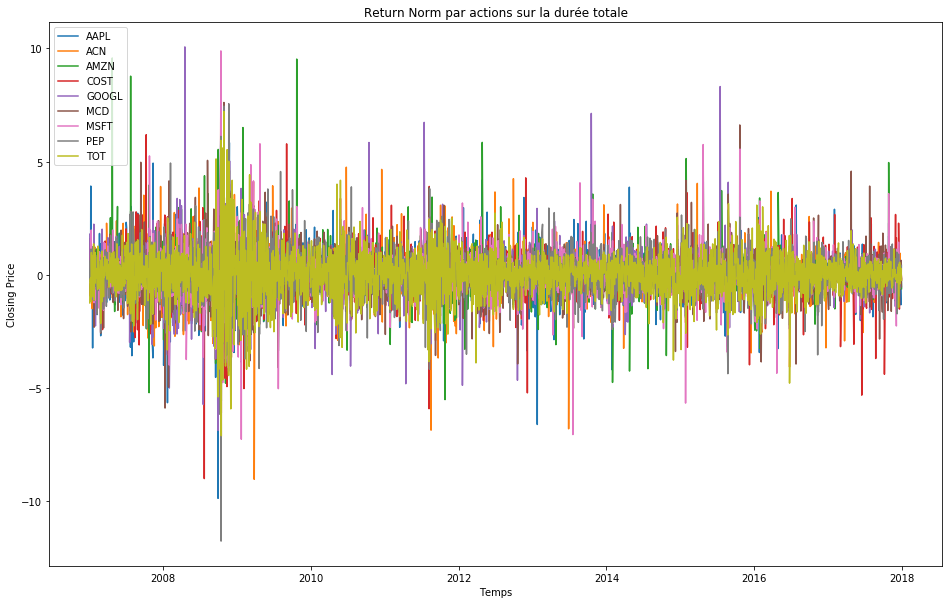

In [89]:
plot_by_stoks(returns_norm.index, returns_norm, 'Return Norm par actions sur la durée totale')

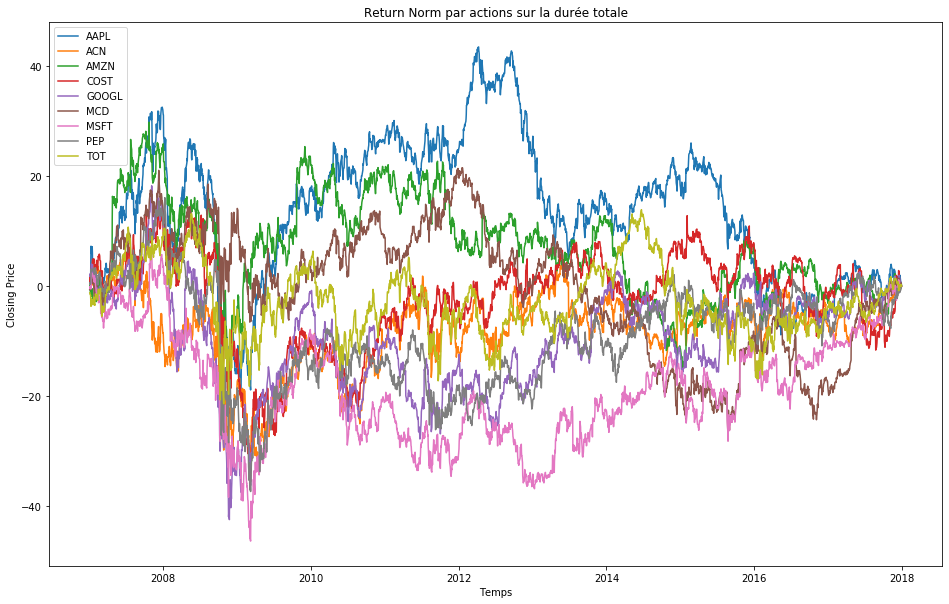

In [13]:
plot_by_stoks(returns_norm.index, returns_norm.cumsum(), 'Returns Normalisés par action sur la durée totale')

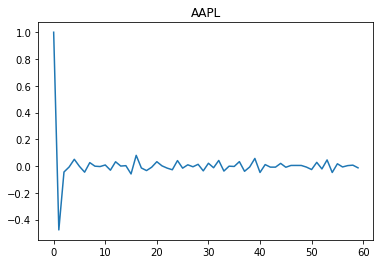

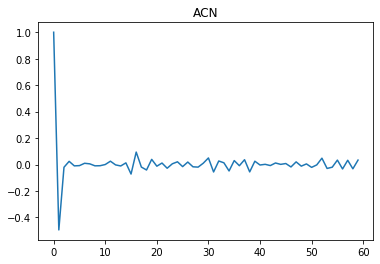

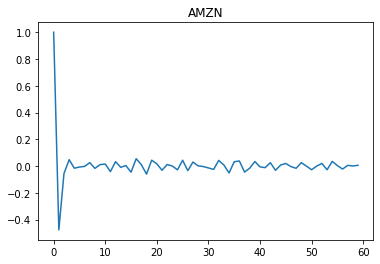

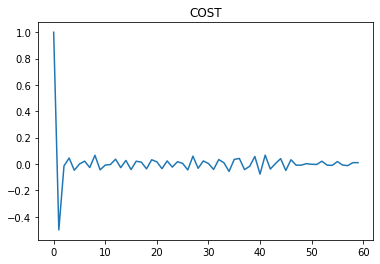

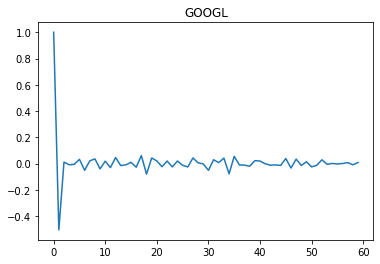

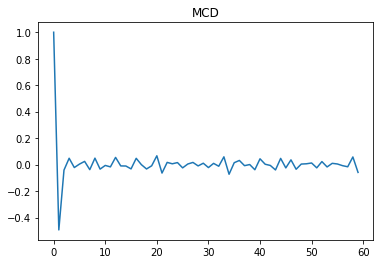

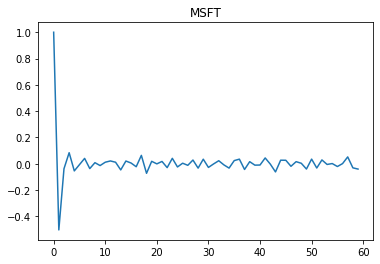

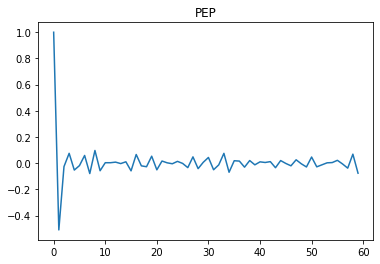

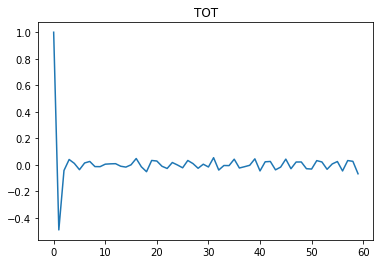

In [26]:
# Avant de commencer notre modéisation, un préalable en série temporelle est d'étudier les autocorrélations des returns pour
# chaque action. Nous avons vu précédemment la présence de clustering de volatilité et évoqué les returns comme une martingale.
# Un corollaire à ceci est la présence de fortes autocorrélations pour les returns normalisés, c'est ce que l'on remarque

for c in returns:
    plt.plot([returns[c].diff().autocorr(i) for i in range(0,60)])
    plt.title(c)
    plt.show()

C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


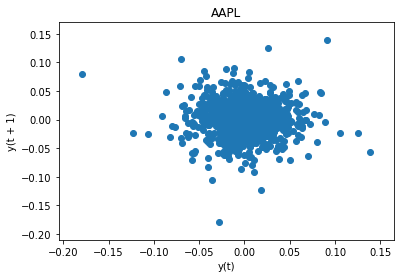

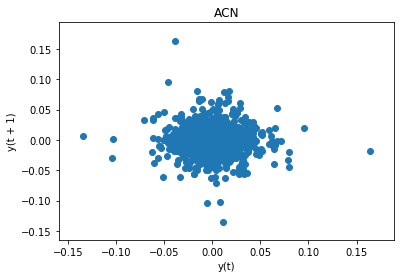

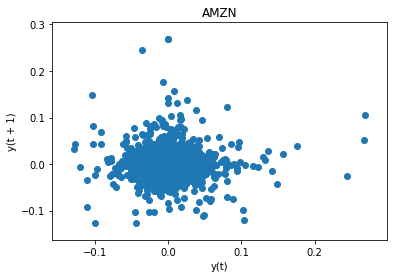

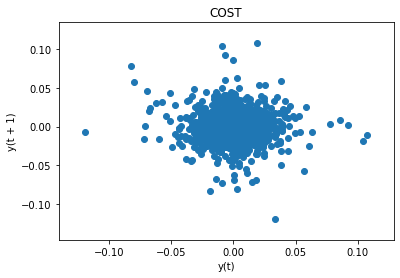

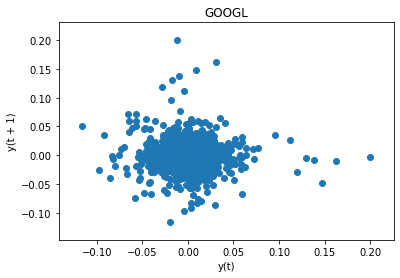

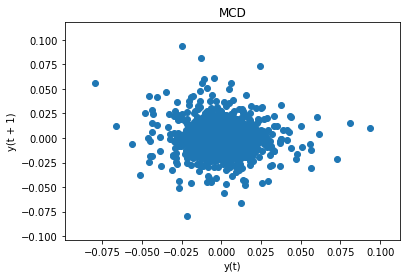

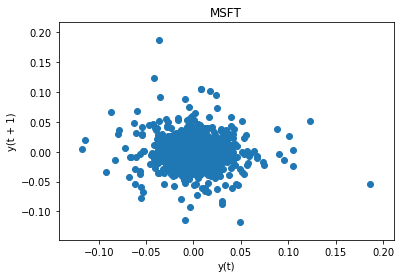

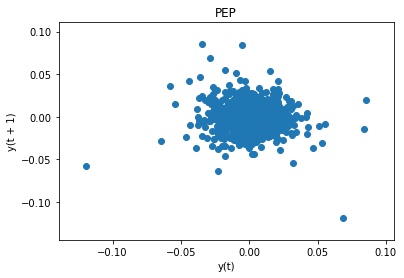

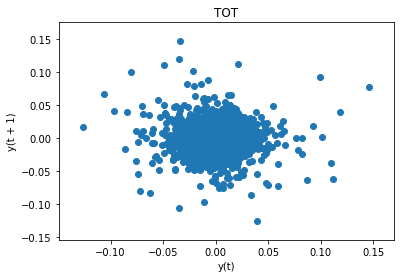

In [17]:
# PLot des lag de returns f(y(t))=y(t+1)
# On remarque une relation Brownienne (et a fortiori martingale) entre t et t+1 pour les returns normalisés. On a en effet une
# concentration des returns au niveau de l'espérance (0) et une étendue homogène tout autour qui deient de plus en plus diffuse,
# à mesure que les returns s'éloignent de l'espérance. C'est une représentation typique du Mouvement Brownien entre t et t+1.

for c in returns:
    f = plt.figure(c)
    lag_plot(returns[c])
    plt.title(c)
    f.show()




## Prédiction des returns normalisés

In [9]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

#AR 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


# A. PCA

In [12]:
# On split notre base en une base train qui comprend 85% des données et test
pca=PCA(n_components=9)

pca_ret= pd.DataFrame(pca.fit_transform(returns_norm), index = returns_norm.index)

dat_train=pd.concat([returns_norm.ewm(2).mean().shift(1),returns_norm.ewm(2).mean().shift(2)],axis=1).dropna().iloc[:2352,1:]
train=pd.DataFrame(pca.fit_transform(dat_train),index=dat_train.index)

dat_test=pd.concat([returns_norm.ewm(2).mean().shift(1),returns_norm.ewm(2).mean().shift(2)],axis=1).dropna().iloc[:,1:]
test=pd.DataFrame(pca.transform(dat_test),index=dat_test.index)


y= pca_ret[0].loc[train.index]
y2 = pca_ret[0].loc[test.index]

In [25]:
pca_ret

,0,1,2,3,4,5,6,7,8
Date,,,,,,,,,
2007-01-04,1.480701,-0.772235,-0.759909,-0.524491,-1.480590,-1.396476,-1.437230,-0.333255,1.114445
2007-01-05,-1.113431,-0.248049,-0.124068,-0.069847,0.762821,0.185709,0.312731,-0.341990,0.704409
2007-01-08,0.254665,0.780978,0.457997,-0.735738,-0.294681,0.079117,-0.625405,-0.604677,-0.330641
2007-01-09,1.393747,-1.835128,-1.257747,-2.409425,0.708390,-0.915608,-1.393234,0.720200,-1.192181
2007-01-10,0.926888,-0.067894,-1.185423,-1.838526,0.666671,-0.560158,-1.911792,0.388255,0.167330
2007-01-11,1.872633,0.756173,-0.518303,0.738316,0.130582,-0.709162,0.876023,-1.590358,0.157968
2007-01-12,1.263979,-0.181358,1.042051,0.805558,-1.425701,-0.040713,0.648764,-0.355171,0.054750
2007-01-16,-0.016349,-0.570914,-1.885980,-0.487639,0.867634,-0.186917,-0.202720,0.209101,-0.666461
2007-01-17,-0.289163,1.721055,0.378669,0.040089,-0.630109,0.445536,-0.064292,-0.122831,0.053145


In [169]:
# Inertie de chaque axe factoriel

print(pca.explained_variance_ratio_)

# Les deux premiers axes factoriels représentent 49% de l'information, la régression linéaire ne se faisant que sur un seul
# axe, elle se basera sur 37% de l'information seulement (première composante)

[0.38311224 0.10545736 0.07961607 0.06477084 0.05942177 0.05224006
 0.04972483 0.04551412 0.04170346]


### 1. Régression Linéaire

In [21]:
clf=LinearRegression(fit_intercept=False)
clf.fit(train,y)


LinearRegression(fit_intercept=False)

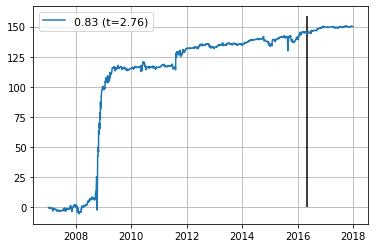

In [36]:
# On affiche un trait vertical au 10/05/2016 qui correspond au début de notre base test prédite.
# On observe une valeur prédite abbérante. Les returns culminent à 150, la régression linéaire n'est pas fiable dans notre cas.

pred=pd.DataFrame(clf.predict(test.dropna()) ,index=test.dropna().index )

plotpnl(pred[0]*pca_ret[0])
plt.vlines('2016-05-10',0,plt.ylim()[1])


In [172]:
# R^2 très faible, ceci n'est pas très étonnant car on effectue une régression sur une composante principale qui n'explique
# qu'un peu plus d'un tiers de la variance totale du modèle. Cela confirme notre intuition précédente de non pertinence de ce
# modèle

r2_score(y2, pred)

0.011905630596104055

###  2. Régression Ridge

In [175]:
# La régression ridge est basée sur le principe de régularisation des contraintes à la base de la régression linéaire 
# classique sur une matrice d’input mal conditionnée (en général trop grande colinéarité entre les variables, ici les actions)
# Cette technique s'utilise donc pour tenter de diminuer la multicolinéarité dans un portefeuille d'actions.

rid = Ridge(100).fit(train,y)

pred_rid=pd.DataFrame(rid.predict(test.dropna()) ,index=test.index)


In [176]:
# Le R^2 est sensiblement le même, la régression ridge n’a donc pas modifié beaucoup la matrice de variance-covariance. 
# On peut penser que la multicolinéarité des returns n'est pas très élevée dans notre portefeuille (c'est ce que l'on a pu
# observer par les matrices de corrélations plus haut)

r2_score(y2, pred_rid)

0.011790181698912772

### 3. Régression Lasso

In [51]:
# La régression Lasso est basée sur le même principe de régularisation que la régression Ridge et s’opère dans les
# mêmes conditions, mais avec une contrainte linéaire sur les coefficients différente


lasso=Lasso(alpha=0.000001,fit_intercept=False)
lasso.fit(train,y)
pred_lasso=pd.DataFrame(lasso.predict(test.dropna()) ,index=test.index)


In [174]:
# R^2 à peu près le même : même remarque que pour la régression ridge
r2_score(y2, pred_lasso)

0.011905647339690684

### B. Gradient Boosting

In [177]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
gbm = xgb.XGBRegressor(seed=4578,booster='gbtree',gamma=10,max_depth=10, n_estimators=200, learning_rate=0.05,).fit(train.values, (y.values))

gbm.fit(train.values,y.values)

pred_gbm = gbm.predict(test.as_matrix())

pred_gbm


C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([ 0.6732558 ,  0.5490994 ,  0.2967084 , ...,  0.04152623,
       -0.00084466, -0.00475895], dtype=float32)

In [28]:
# On obtient un R^2 bien meilleur avec un modèle XGBoost effectué sur uniquement la première composante de la PCA

print('Mean Squared Error:', metrics.mean_squared_error(y2, pred_gbm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, pred_gbm)))
print('R^2 Score:', metrics.r2_score(y2, pred_gbm))

Mean Squared Error: 1.6703030009621251
Root Mean Squared Error: 1.2924020276067836
R^2 Score: 0.6262106016428272


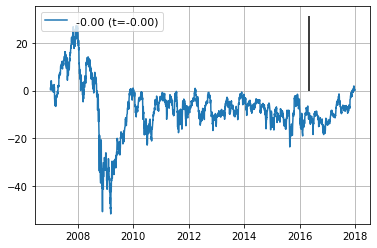

In [29]:
# Les returns normalisés prédits par le XGBoost demeurent négatifs entre 2016 et 2018 pour notre base test.
plotpnl(pred_gbm[0]*pca_ret[0])
plt.vlines('2016-05-10',0,plt.ylim()[1])

## Random Forest

In [39]:
##Random Forest

for i in tqdm(range(1, 50)):
    rf = RandomForestRegressor(100, criterion='mse',min_samples_leaf=10).fit(train.values,y.values)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [01:28<00:00,  1.95s/it]


In [40]:
rf_pred = rf.predict(test.as_matrix())
rf_pred

C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 1.33292162,  0.419781  ,  0.25465162, ...,  0.08997548,
       -0.07339693,  0.15935658])

In [229]:
print('Mean Squared Error:', metrics.mean_squared_error(y2, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, rf_pred)))
print('R^2 Score:', metrics.r2_score(y2, rf_pred))

Mean Squared Error: 3.063277105534837
Root Mean Squared Error: 1.7502220160696291
R^2 Score: 0.31448335684027606


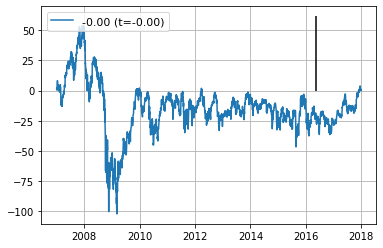

In [65]:
# Les prédictions issues de la RF sont à peu près les mêmes qu'avec XGBoost
plotpnl(rf_pred[0]*pca_ret[0])
plt.vlines('2016-05-10',0,plt.ylim()[1])

## Construction de deux portefeuilles 


### 1. Construction d'un portefeuille 1/N (moyenne simple) 

In [42]:
Portef_1oN=(returns_norm.mean(1))
Portef_1oN

Date
2007-01-04    0.502755
2007-01-05   -0.379217
2007-01-08    0.081537
2007-01-09    0.491994
2007-01-10    0.335814
2007-01-11    0.604238
2007-01-12    0.404352
2007-01-16    0.012554
2007-01-17   -0.095867
2007-01-18   -0.765713
2007-01-19    0.011322
2007-01-22   -0.612050
2007-01-23    0.120387
2007-01-24    0.425285
2007-01-25   -1.069426
2007-01-26   -0.050691
2007-01-29    0.121651
2007-01-30    0.227208
2007-01-31    0.664734
2007-02-01   -0.053788
2007-02-02   -0.289069
2007-02-05   -0.434401
2007-02-06    0.141702
2007-02-07    0.300937
2007-02-08   -0.387222
2007-02-09   -0.443577
2007-02-12   -0.143664
2007-02-13    0.323720
2007-02-14    0.532663
2007-02-15    0.057066
                ...   
2017-11-16    0.420587
2017-11-17   -0.408463
2017-11-20    0.078573
2017-11-21    0.628694
2017-11-22    0.044429
2017-11-24    0.209157
2017-11-27    0.126970
2017-11-28    0.261116
2017-11-29   -0.444479
2017-11-30    0.547766
2017-12-01   -0.138835
2017-12-04   -0.378428
2017-1

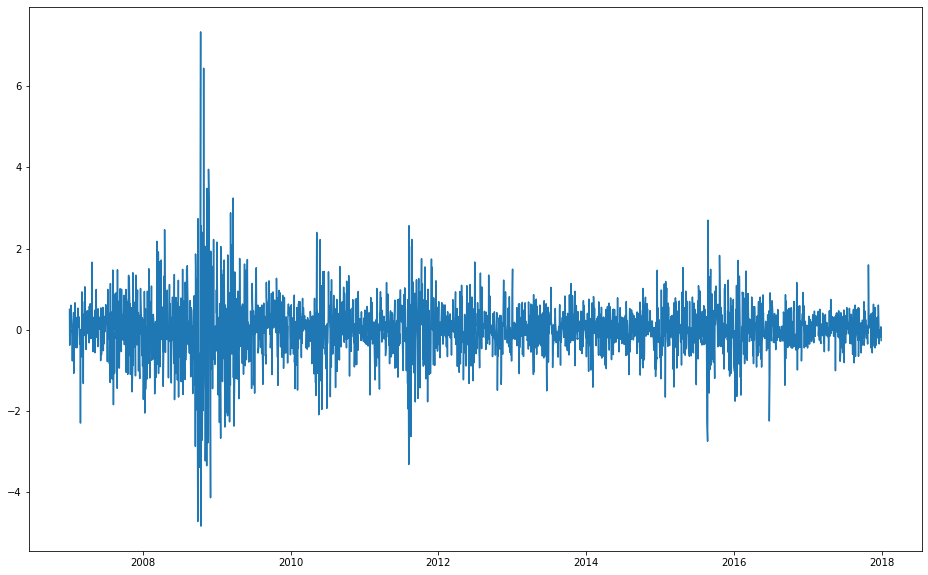

In [43]:
# Les returns moyens du portefeuilles ont les mêmes caractéristiques que celles citées précédemment pour les actions prises
# individuellement : clusters de volatilité, autocorrélation etc... 

fig = plt.figure(figsize=(16,10))
plt.plot(Portef_1oN.index, Portef_1oN)

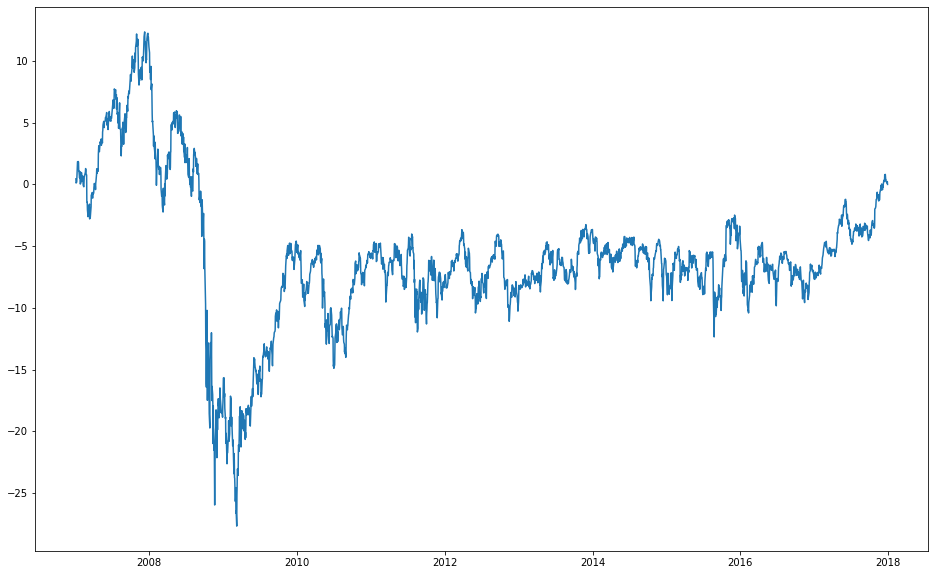

In [235]:
# Les returns cumulés affichent une perte généralisée entre 2008 et 2018. Il semble y avoir une perçée des returns dans la 
# partie positive du graphe à partir de début 2008.

fig = plt.figure(figsize=(16,10))
plt.plot(Portef_1oN.index, Portef_1oN.cumsum())

### 2. Markovitz

On construit un portefeuille de Markovitz en se basant sur les resultats du calcul du ratio de sharpe. 
Le ratio de Sharpe décrit la relation entre le surplus de return pour un portefeuille, et le surplus de volatilité auquel il 
est soumis. Autrement dit : quel sera l'effet de l'ajout d'un actif risqué  dans le portefeuille sur sa rentabilité.

Le calcul du Ratio de Sharpe n'est rien d'autre qu'un test de Student, c'est à dire un test de comparaison de moyenne, entre
le taux de rendement moyen de l'actif risqué considéré et le taux sans risque; cela pondéré par la volatilité du taux sans
risque i.e son écart-type. 

Le portefeuille de Markovitz que nous allons créer calcule donc les poids les plus efficients pour chaque actif, de sorte qu'ils maximisent le rendement tout en minimisant le risque de portefeuille.

In [21]:
from scipy.linalg import inv
cov=returns_norm.cov()
conv_inv=inv(cov)
perfs=SR(returns_norm)[0]
W=conv_inv.dot(perfs)
marko_pnls=(returns_norm.mul(W,1))

In [48]:
# Comme on peut le voir, les poids sont quasiment nuls. Cela est logique car les prédictions que l'on a pu voir affichaient 
# un rendement quasiment nul pour tous nos portefeuilles sur 2017 et 2018. La stratégie d'investissement la plus intéressante
# est donc celle qui consiste à ne pas investir (du moins pas dans ces 10 actions)


marko_pnls

Symbols,AAPL,ACN,AMZN,COST,GOOGL,MCD,MSFT,PEP,TOT
Date,,,,,,,,,
2007-01-04,4.410057e-15,3.497645e-15,-1.686004e-15,-8.526118e-15,1.024451e-14,-2.359755e-16,-3.063886e-16,-3.361514e-16,-4.603963e-16
2007-01-05,-1.735839e-15,-2.336912e-15,7.053161e-15,4.788256e-15,2.318730e-15,-1.642464e-17,-8.665881e-16,1.772011e-16,-9.850280e-17
2007-01-08,7.922773e-16,2.205008e-15,1.126130e-14,-1.337392e-15,-2.534821e-15,9.753399e-17,1.287129e-15,-9.891633e-17,-5.894349e-17
2007-01-09,1.717160e-14,-4.899966e-16,-2.754946e-15,-2.590389e-15,1.019053e-15,3.699618e-17,6.586855e-17,-1.960811e-16,-3.201162e-16
2007-01-10,9.789336e-15,8.433630e-16,8.471813e-15,-2.430801e-15,2.326309e-15,2.968404e-16,-1.466042e-15,-6.318023e-16,-4.390336e-16
2007-01-11,-2.836410e-15,-7.453853e-16,-2.412145e-15,-6.067323e-15,6.325210e-15,1.484372e-16,4.802743e-15,-6.237302e-16,1.413615e-16
2007-01-12,-2.825143e-15,3.290335e-15,-9.229881e-15,-4.064941e-15,3.078718e-15,-2.065883e-16,2.236709e-15,2.121337e-16,3.682404e-16
2007-01-16,5.251627e-15,-3.805460e-15,-4.882560e-15,-1.736669e-15,-6.660699e-16,2.145896e-16,-2.963072e-16,-1.037533e-16,-3.620116e-16
2007-01-17,-4.884789e-15,1.705174e-15,1.009962e-14,-2.727389e-15,-4.555721e-15,1.734855e-16,-3.412957e-16,-1.034786e-16,8.703741e-17


## J'aggrège l'ensemble des systèmes construits et analyser la performance globale



In [1]:
# Nous comparons maintenant comparer nos trois PnL (gains et perte d'un portefeuille).
# Le premier pnl est appliqué sur le portefeuille des moyennes pondérées des returns journaliers de chaque action.
# Le deuxième est est appliqué sur le portefeuille  de markovitz construit précédemment
# Le troisième pnl est issu des prédictions d'XGBoost (modèle avec le plus fort R^2)

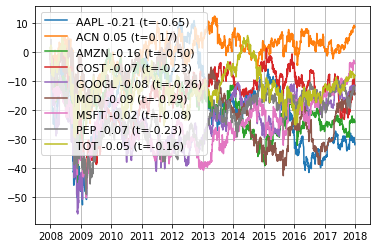

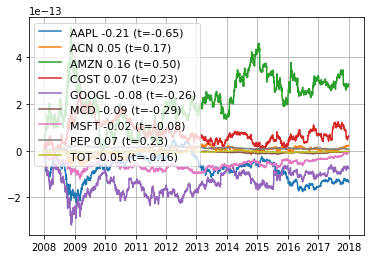

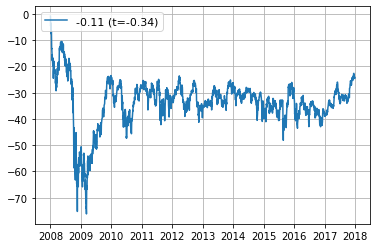

In [69]:
plotpnl(returns_norm['2008':])
plt.figure()
plotpnl(marko_pnls['2008':])
plt.figure()
plotpnl(pred_gbm[0]*pca_ret[0]['2008':])

In [20]:
# final pnl
pnl=pd.DataFrame()
pnl['marko']=(marko_pnls.mean(1))
pnl['1/N']=Portef_1oN
pnl['XGBoost']=(pred_gbm[0]*pca_ret[0])

NameError: name 'marko_pnls' is not defined

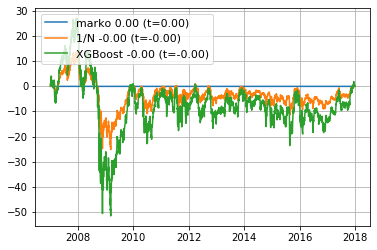

In [77]:
plotpnl((pnl))